# Employees Performance Analysis Notebook
## 1) Libraries importation 

In [1]:
# Importing of differents libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import shapiro

## 2) Data set loading  and exploration

In [ ]:
# Loading of the dataset 
df = pd.read_csv(r"C:\Users\Espadon\Desktop\PortfolioProjects-main\Extended_Employee_Performance_and_Productivity_Data.csv", encoding='ISO-8859-1')
df.head(10)

In [17]:
# data exploration 
print(df.shape)
print(df.columns)
print(df.dtypes)
df.head()

(100000, 21)
Index(['department', 'gender', 'age', 'job_title', 'hire_date',
       'years_at_company', 'education_level', 'performance_score',
       'monthly_salary', 'work_hours_per_week', 'projects_handled',
       'overtime_hours', 'sick_days', 'remote_work_frequency', 'team_size',
       'training_hours', 'promotions', 'employee_satisfaction_score',
       'resigned', 'Performance_Level', 'remote_category'],
      dtype='object')
department                             object
gender                                 object
age                                     int64
job_title                              object
hire_date                      datetime64[ns]
years_at_company                        int64
education_level                        object
performance_score                       int64
monthly_salary                        float64
work_hours_per_week                     int64
projects_handled                        int64
overtime_hours                          int64
sick_day

,department,gender,age,job_title,hire_date,years_at_company,education_level,performance_score,monthly_salary,work_hours_per_week,...,overtime_hours,sick_days,remote_work_frequency,team_size,training_hours,promotions,employee_satisfaction_score,resigned,Performance_Level,remote_category
Employee_ID,,,,,,,,,,,,,,,,,,,,,
1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,...,22,2,0,14,66,0,2.63,False,High,Never
2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,...,13,14,100,12,61,2,1.72,False,High,Always
3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,...,6,3,50,10,1,0,3.17,False,Medium,Sometimes
4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,...,28,12,100,10,0,1,1.86,False,Low,Always
5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,...,29,13,100,15,9,1,1.25,False,Low,Always


## 3) Data cleaning and Preprocessing

In [ ]:
# Checking for duplicated values
print("Number of duplicated rows:", df.duplicated().sum())

# Dropping duplicates
df = df.drop_duplicates()

# Checking for missing values
print("\nMissing values per column:", df.isna().sum())

# Convert date column
df["Hire_Date"] = pd.to_datetime(df["Hire_Date"], errors='coerce')

# set "Employee_ID" as index

df = df.set_index("Employee_ID")

# Standardize column names
df.columns = df.columns.str.lower()

# transform performance level into news variables 
def performance_level(score):
    if score <= 2:
        return 'Low'
    elif score == 3:
        return 'Medium'
    else:
        return 'High'

df['Performance_Level'] = df['performance_score'].apply(performance_level)

# Categorize "remote_work_frequency"
df['remote_category'] = df['remote_work_frequency'].map({
    0: 'Never',
    25: 'Rarely',
    50: 'Sometimes',
    75: 'Often',
    100: 'Always'
})

## 4) Exploratory Data Analysis(EDA)
### Demographic

In [18]:
# Total number of employees 
print("Total Employees:", df.shape[0])

# Employees distribution  by gender
employees_by_gender = df["gender"].value_counts(normalize= True)
print("Employees distribution  by gender\n", employees_by_gender)

# Employees distribution  by educational level
employees_by_education = df['education_level'].value_counts(normalize= True)
print(" Employees distribution  by Marital status\n", employees_by_education )

Total Employees: 100000
Employees distribution  by gender
 gender
Male      0.48031
Female    0.48001
Other     0.03968
Name: proportion, dtype: float64
 Employees distribution  by Marital status
 education_level
Bachelor       0.50041
High School    0.30004
Master         0.14904
PhD            0.05051
Name: proportion, dtype: float64


### Basic analysis 

In [19]:
# Employees distribution  by department 
employees_by_department = df["department"].value_counts(normalize= True)
print("Employees distribution  by department \n", employees_by_department)

# Employees distribution  by job title
employees_by_job = df['job_title'].value_counts(normalize= True)
print(" Employees distribution  by job title\n", employees_by_job )

# employee distribution by working style 
employees_by_work = df['remote_category'].value_counts(normalize= True)
print(" employee distribution by working stylee\n", employees_by_work )


Employees distribution  by department 
 department
Marketing           0.11216
Finance             0.11200
Operations          0.11181
IT                  0.11131
Sales               0.11122
Legal               0.11118
Customer Support    0.11116
HR                  0.10960
Engineering         0.10956
Name: proportion, dtype: float64
 Employees distribution  by job title
 job_title
Specialist    0.14507
Manager       0.14325
Technician    0.14285
Analyst       0.14261
Engineer      0.14217
Consultant    0.14210
Developer     0.14195
Name: proportion, dtype: float64
 employee distribution by working stylee
 remote_category
Rarely       0.20235
Often        0.20173
Always       0.20049
Never        0.19837
Sometimes    0.19706
Name: proportion, dtype: float64


### Descriptive analysis 

In [20]:
df.describe()

,age,hire_date,years_at_company,performance_score,monthly_salary,work_hours_per_week,projects_handled,overtime_hours,sick_days,remote_work_frequency,team_size,training_hours,promotions,employee_satisfaction_score
count,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.029410,2019-09-15 06:20:20.916036096,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
min,22.000000,2014-09-07 08:03:05.556036,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,31.000000,2017-03-20 08:03:05.556036096,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,41.000000,2019-09-21 08:03:05.556036096,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,51.000000,2022-03-14 08:03:05.556036096,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,60.000000,2024-09-03 08:03:05.556036,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000
std,11.244121,NaN,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719


## 5) Performance analysis 
### Exploratory analysis 

In [21]:
# Performance by gender
performance_by_gender = pd.crosstab(df['gender'], df['Performance_Level']) 
print("performance by department\n", performance_by_gender)

#Performance by department 
performance_by_department = pd.crosstab(df['department'], df['Performance_Level'])
print("Average performance by department\n", performance_by_department)

# Performance by job title
performance_by_job_title = pd.crosstab(df['job_title'], df['Performance_Level'])
print("Average performance by job title\n", performance_by_job_title)

# Performance by education level
performance_by_education = pd.crosstab(df['education_level'], df['Performance_Level'])
print("Average performance by education level\n", performance_by_education)

# performance by remote category
performance_by_remote_category = pd.crosstab(df['remote_category'], df['Performance_Level'])
print("Performance by remote category\n", performance_by_remote_category)

# Performance by resignation 
performance_by_resignation = pd.crosstab(df['resigned'], df['Performance_Level'])
print("Performance by remote category\n", performance_by_resignation)


performance by department
 Performance_Level   High    Low  Medium
gender                                 
Female             18948  19250    9803
Male               19321  19267    9443
Other               1599   1616     753
Average performance by department
 Performance_Level  High   Low  Medium
department                           
Customer Support   4441  4448    2227
Engineering        4414  4322    2220
Finance            4444  4585    2171
HR                 4368  4389    2203
IT                 4462  4493    2176
Legal              4415  4520    2183
Marketing          4390  4506    2320
Operations         4503  4423    2255
Sales              4431  4447    2244
Average performance by job title
 Performance_Level  High   Low  Medium
job_title                            
Analyst            5653  5749    2859
Consultant         5713  5679    2818
Developer          5586  5732    2877
Engineer           5628  5642    2947
Manager            5760  5753    2812
Specialist         5

### Chisquare analysis 

In [22]:
# Chi square analysis of the performance related to other varaiables
from scipy.stats import chi2_contingency
# test if the performance_level  is function of other categorical variable 
cat_col = df.select_dtypes(include = ["object", "bool"]).columns
final_cat_col = cat_col.drop(["Performance_Level"])
target = "Performance_Level"
df_clean = df[[*final_cat_col, target]]

chi2_results = []
for col in final_cat_col:
    contingency_table = pd.crosstab(df_clean[col], df_clean[target])
    if contingency_table.shape[0] >1 and contingency_table.shape[1]>1:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi2_results.append({
            "variable": col,
            "Chi2 Statistic": chi2,
            "p-value": p,
            "Degree of Freedom": dof})
result = pd.DataFrame(chi2_results).sort_values(by ="p-value")

print(result)

          variable  Chi2 Statistic   p-value  Degree of Freedom
1           gender       13.092398  0.010833                  4
3  education_level       16.032247  0.013582                  6
2        job_title       13.408868  0.340036                 12
5  remote_category        7.750592  0.458205                  8
0       department       15.195484  0.510370                 16
4         resigned        0.368346  0.831792                  2


### Performance analysis with other quantitative variables 

In [23]:
# Select numerical variables
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Exclude target if accidentally in num_cols
num_cols = num_cols.drop(['performance_score',"remote_work_frequency"])


In [24]:
# test for normality  
for col in num_cols:
    stat, p_value = shapiro(df[col])
    print(f"{col}: p-value = {p_value:.4f} (Normal: {'Yes' if p_value > 0.05 else 'No'})")

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


age: p-value = 0.0000 (Normal: No)
years_at_company: p-value = 0.0000 (Normal: No)
monthly_salary: p-value = 0.0000 (Normal: No)
work_hours_per_week: p-value = 0.0000 (Normal: No)
projects_handled: p-value = 0.0000 (Normal: No)
overtime_hours: p-value = 0.0000 (Normal: No)
sick_days: p-value = 0.0000 (Normal: No)
team_size: p-value = 0.0000 (Normal: No)
training_hours: p-value = 0.0000 (Normal: No)
promotions: p-value = 0.0000 (Normal: No)
employee_satisfaction_score: p-value = 0.0000 (Normal: No)


In [ ]:
# Boxplots for visual comparison ===
print("=== Boxplots ===")
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Performance_Level', y=col, data=df)
    plt.title(f"{col} by Performance Level")
    plt.tight_layout()
    plt.show()

In [25]:
# Run Kruskal-Wallis for each numerical variable
results = {}
for col in num_cols:
    groups = [df[df['Performance_Level'] == dept][col] for dept in df["Performance_Level"].unique()]
    stat, p_value = kruskal(*groups)
    results[col] = {'H-statistic': stat, 'p-value': p_value}

# Convert results to a DataFrame for better readability
import pandas as pd
results_df = pd.DataFrame(results).T
results_df['Significant? (p < 0.05)'] = results_df['p-value'] < 0.05
print(results_df.sort_values(by='p-value'))

                              H-statistic   p-value  Significant? (p < 0.05)
monthly_salary               20745.898667  0.000000                     True
team_size                       10.826572  0.004457                     True
sick_days                        7.641849  0.021908                     True
promotions                       4.191144  0.123000                    False
work_hours_per_week              2.616552  0.270286                    False
training_hours                   1.933560  0.380306                    False
overtime_hours                   1.278814  0.527605                    False
age                              0.753489  0.686091                    False
years_at_company                 0.741383  0.690257                    False
projects_handled                 0.519057  0.771415                    False
employee_satisfaction_score      0.206877  0.901731                    False


In [ ]:
df.head(10)

## 5) Satisfaction  analysis 
### Exploratory analysis 

=== Boxplots ===


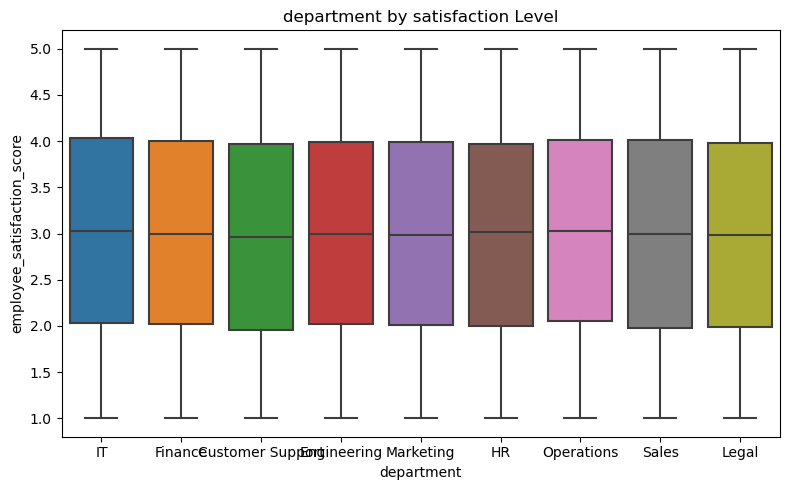

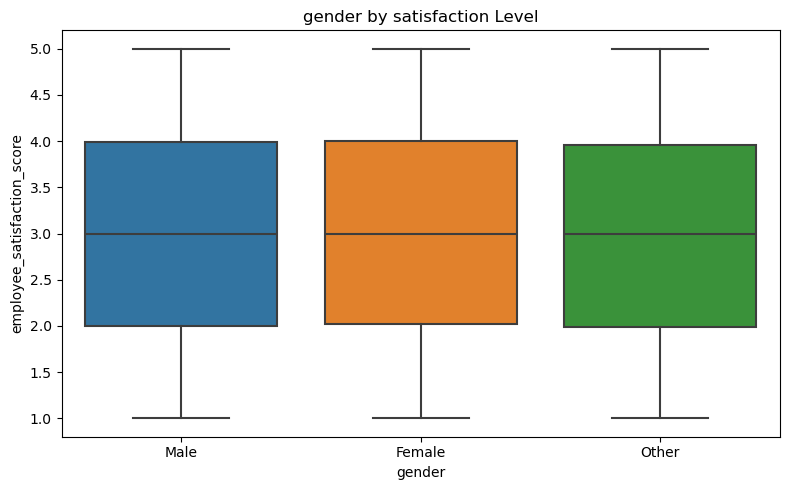

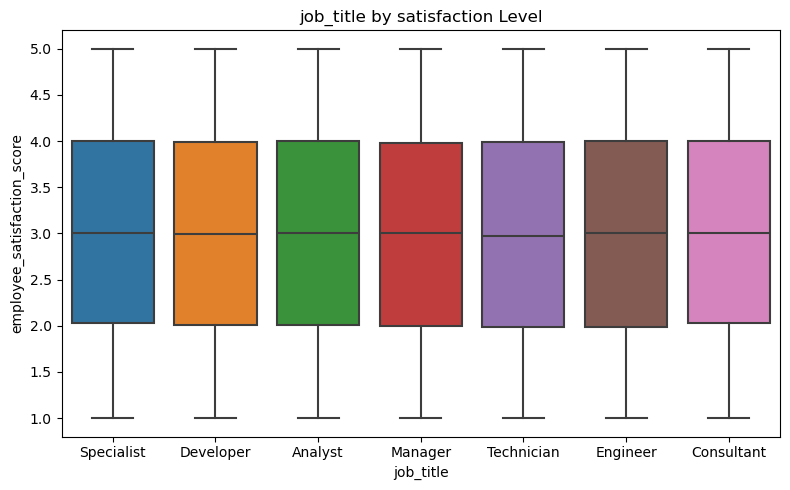

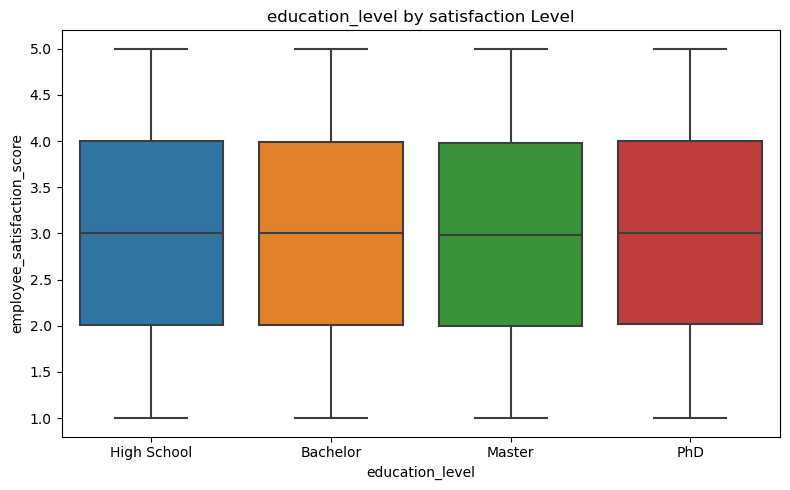

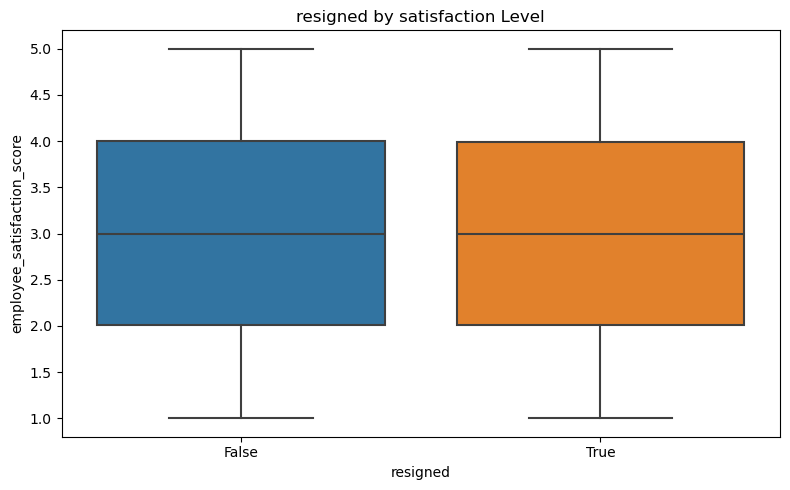

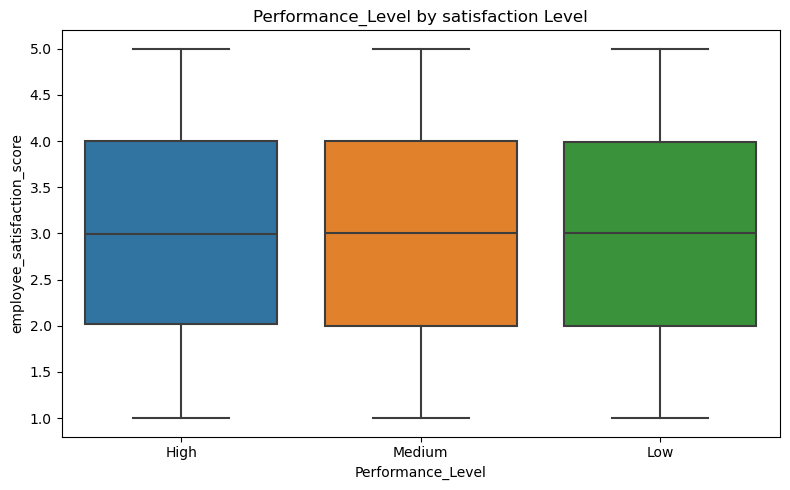

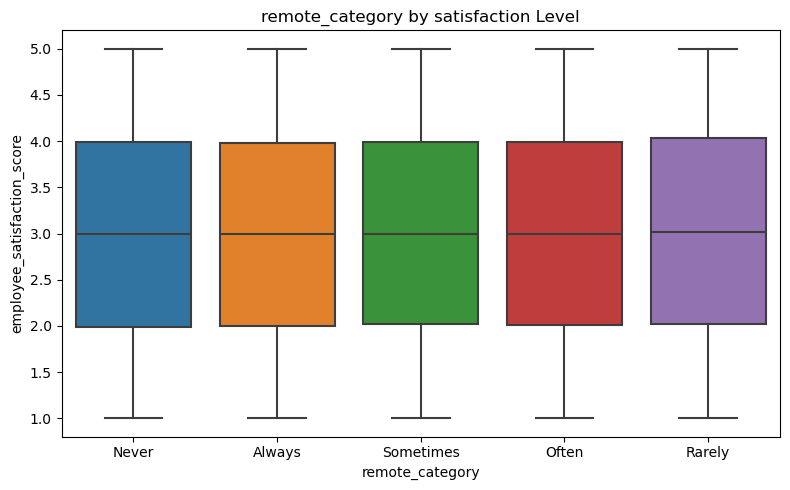

In [26]:
# Boxplots for visual comparison 
print("=== Boxplots ===")
for col in cat_col:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col, y='employee_satisfaction_score', data=df)
    plt.title(f"{col} by satisfaction Level")
    plt.tight_layout()
    plt.show()

In [27]:
# Satisfaction by gender
satisfaction_by_gender = df.groupby("gender")["employee_satisfaction_score"].mean()
print("Satisfaction by gendert\n", satisfaction_by_gender)

Satisfaction by gendert
 gender
Female    3.004598
Male      2.994508
Other     2.987893
Name: employee_satisfaction_score, dtype: float64
